In [1]:
import sys
from __future__ import division, print_function, absolute_import
sys.path.append('/home/ajss/notebooks/deep-learning-projects/')

from tqdm import tqdm
from cnn import ConvolutionalNetwork

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Image
from tensorflow.python.ops import control_flow_ops
from utils import tile_raster_images
import IPython.display
import math
%matplotlib inline

def saveFileForSubmission(predicted_lables,custonFileName='submission.csv',customHeader='ImageId,Label'):
    result = np.c_[range(1,len(predicted_lables)+1),predicted_lables]

    np.savetxt(custonFileName, 
           result.astype(int), 
           delimiter=',', 
           header = customHeader, 
           comments = '', 
           fmt='%u,%u')

(42000, 784)
(42000, 10)


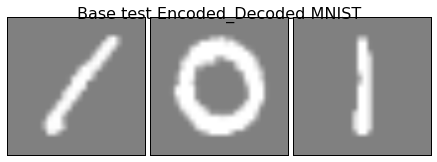

In [2]:
def next_batch(index,data,labels,batch_size=10):
    """Return the next `batch_size` examples from this data set."""
    total = data.shape[0]
    end = index + batch_size
    max_end =  max(0, index + batch_size - total)
    retData =  np.concatenate((data[index:end],data[:max_end]), axis=0)
    retlabel =  np.concatenate((labels[index:end],labels[:max_end]), axis=0)
    return retData,retlabel
def plot_gallery(title, images, n_col, n_row,image_shape = (28, 28)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()   
    
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# read training data from CSV file 
dataTrain = pd.read_csv('./kaggle-mnist/train.csv')
images = dataTrain.iloc[:,1:].values
images = images.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)

labels_flat = dataTrain[[0]].values.ravel()
labels_count = np.unique(labels_flat).shape[0]
labels = dense_to_one_hot(labels_flat, labels_count)
#labels = labels_flat #dense_to_one_hot(labels_flat, labels_count)
#labels = labels.astype(np.uint8)

print(images.shape)
print(labels.shape)
for i in range(1):
    batch_xs, batch_ys = next_batch(i*10, images,labels)
    plot_gallery('Base test Encoded_Decoded MNIST',batch_xs[:3],3,1)


CNN - Classification
-------------

In [3]:

# Autoencoder
layers="conv2d-5-5-32-1,maxpool-2,conv2d-5-5-64-1,maxpool-2,full-1024,softmax"
n_features = 784
n_classes = 10
original_shape = [28,28,1]
cnn = ConvolutionalNetwork(layers=layers,n_features=n_features,n_classes=n_classes,original_shape=original_shape,keep_prob=0.9)


Building Convolutional layer with 1 input channels                      and 32 5x5 filters with stride 1
Building Max Pooling layer with size 2
Building Convolutional layer with 32 input channels                      and 64 5x5 filters with stride 1
Building Max Pooling layer with size 2
Building fully connected layer with 3136 in units                          and 1024 out units
Building softmax layer with 1024 in units and                      10 out units


In [5]:
# Train DBN
batch_size = 30
epoch = 2
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

interactions = int(math.floor(X_train.shape[0]/batch_size))
print_times = 3
print('CNN')
for i in tqdm(range(2)):
    cost = 0.0
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, X_train,y_train,batch_size)
        cost += cnn.partial_fit(batch_xs,batch_ys)
    print(i,'cost: ',cost)



  0%|          | 0/2 [00:00<?, ?it/s]

CNN


 50%|█████     | 1/2 [00:20<00:20, 20.98s/it]

0 cost:  204.173988238


100%|██████████| 2/2 [00:42<00:00, 20.99s/it]

1 cost:  190.207050756


In [10]:
cnn.saveWeights('./data-models/cnn/')


FailedPreconditionError: ./data-models/cnn/.tempstate7581376497299057067
	 [[Node: save/save = SaveSlices[T=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/save/tensor_names, save/save/shapes_and_slices, Variable/_5067, Variable_1/_5069, Variable_2/_5071, Variable_3/_5073, Variable_4/_5075, Variable_5/_5077, Variable_6/_5079, Variable_7/_5081)]]
Caused by op u'save/save', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python2.7/dist-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 498, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-37487d90b166>", line 7, in <module>
    cnn = ConvolutionalNetwork(layers=layers,n_features=n_features,n_classes=n_classes,original_shape=original_shape,keep_prob=0.9)
  File "cnn.py", line 85, in __init__
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 861, in __init__
    restore_sequentially=restore_sequentially)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 517, in build
    save_tensor = self._AddSaveOps(filename_tensor, vars_to_save)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 213, in _AddSaveOps
    save = self.save_op(filename_tensor, vars_to_save)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 165, in save_op
    tensor_slices=[vs.slice_spec for vs in vars_to_save])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/io_ops.py", line 179, in _save
    tensors, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 438, in _save_slices
    data=data, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 710, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


In [7]:
# cnn.restoreWeights('./data-models/cnn/')
y_true, y_pred = np.argmax(y_test, axis=1), cnn.predict(X_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       408
          1       0.94      0.99      0.97       471
          2       0.95      0.94      0.95       420
          3       0.95      0.97      0.96       506
          4       0.96      0.94      0.95       397
          5       0.96      0.92      0.94       339
          6       0.94      0.98      0.96       402
          7       0.93      0.94      0.94       438
          8       0.96      0.92      0.94       403
          9       0.95      0.92      0.93       416

avg / total       0.95      0.95      0.95      4200



In [14]:
# read test data from CSV file 
datatest = pd.read_csv('./kaggle-mnist/test.csv')
imagestest = datatest.iloc[:,:].values
imagestest = imagestest.astype(np.float)
imagestest = np.multiply(imagestest, 1.0 / 255.0)


In [15]:
saveFileForSubmission(cnn.predict(imagestest),custonFileName="custoCnn1.csv")